In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


# Reading and Understanding the Data

In [2]:
dataset = pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")
data_dict = pd.read_excel("/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx")

In [3]:
dataset.shape

(205, 26)

In [4]:
data_dict.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,DATA DICTONARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1,Car_ID,NaN,NaN,NaN,Unique id of each observation (Interger),NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,2,Symboling,NaN,NaN,NaN,"Its assigned insurance risk rating, A value of...",NaN,NaN


In [5]:
temp = pd.DataFrame(data_dict.iloc[3:29, 6]).join(data_dict.iloc[3:, 7]).join(data_dict.iloc[3:, 11])
temp.columns = ["S.No,", "Field", "Desc"]
pd.set_option('display.max_colwidth', None)

temp

,"S.No,",Field,Desc
3,1,Car_ID,Unique id of each observation (Interger)
4,2,Symboling,"Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)"
5,3,carCompany,Name of car company (Categorical)
6,4,fueltype,Car fuel type i.e gas or diesel (Categorical)
7,5,aspiration,Aspiration used in a car (Categorical)
8,6,doornumber,Number of doors in a car (Categorical)
9,7,carbody,body of car (Categorical)
10,8,drivewheel,type of drive wheel (Categorical)
11,9,enginelocation,Location of car engine (Categorical)
12,10,wheelbase,Weelbase of car (Numeric)


In [6]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Cleaning Data

In [8]:
dataset = dataset.assign(company = lambda x: [name[0] for name in x.CarName.str.split()])

In [9]:
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [10]:
doors_mapper = {"two": 2, "four": 4}
dataset["doornumber"] = [doors_mapper[door_string] for door_string in dataset["doornumber"]]
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [11]:
dataset["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [12]:
fueltype_mapper = {"gas": 0, "diesel": 1}
dataset["fueltype"] = [fueltype_mapper[fuel_string] for fuel_string in dataset["fueltype"]]

In [13]:
dataset["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [14]:
aspiration_mapper = {"std": 0, "turbo": 1}
dataset["aspiration"] = [aspiration_mapper[aspiration_string] for aspiration_string in dataset["aspiration"]]
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,0,0,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,0,0,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,0,0,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,0,0,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,0,0,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,0,1,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,0,0,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,1,1,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [15]:
print("carbody: ", dataset["carbody"].unique())
print("drivewheel: ", dataset["drivewheel"].unique())
print("enginelocation: ", dataset["enginelocation"].unique())
print("enginetype: ", dataset["enginetype"].unique())
print("cylindernumber: ", dataset["cylindernumber"].unique())
print("fuelsystem: ", dataset["fuelsystem"].unique())
print("company: ", dataset["company"].unique())


carbody:  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel:  ['rwd' 'fwd' '4wd']
enginelocation:  ['front' 'rear']
enginetype:  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber:  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem:  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
company:  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

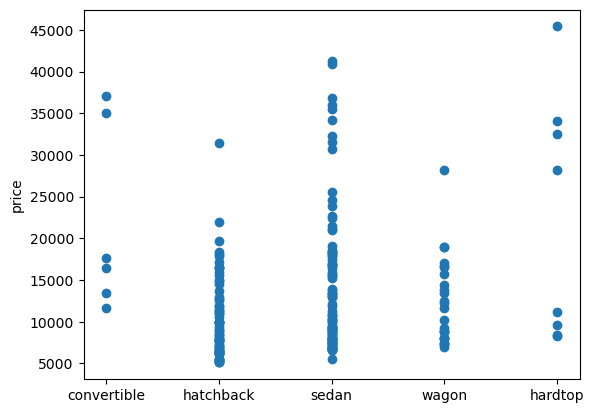

In [17]:
plt.scatter(dataset["carbody"], dataset["price"])
plt.ylabel("price")
plt.show()

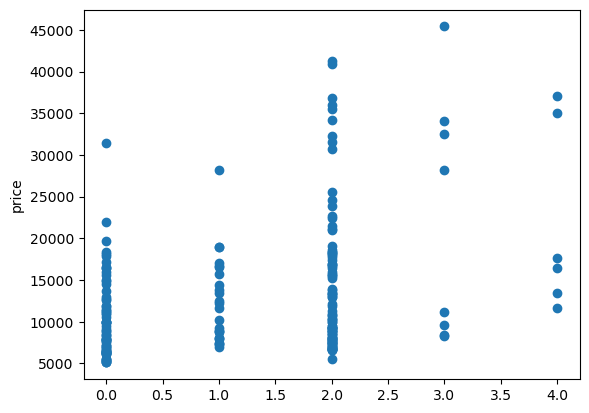

In [18]:
carbody_mapper = {"hatchback": 0, "sedan": 2, "wagon": 1, "hardtop": 3, "convertible": 4}
dataset["carbody"] = [carbody_mapper[carbody_string] for carbody_string in dataset["carbody"]]

plt.scatter(dataset["carbody"], dataset["price"])
plt.ylabel("price")
plt.show()

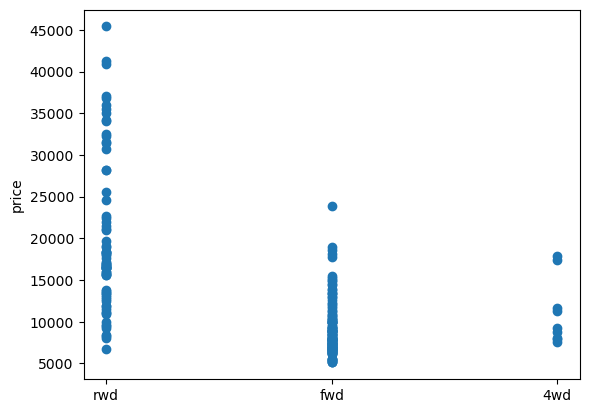

In [19]:
plt.scatter(dataset["drivewheel"], dataset["price"])
plt.ylabel("price")
plt.show()

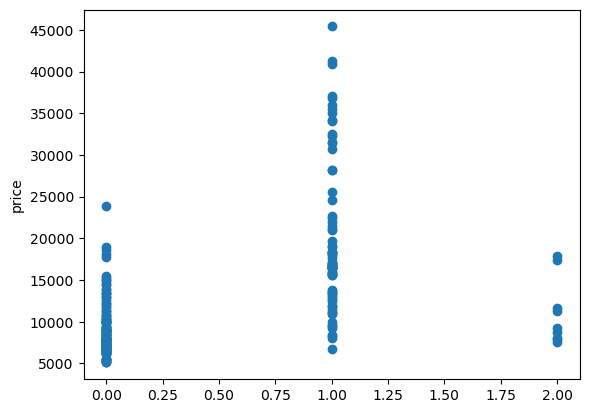

In [20]:
drivewheel_mapper = {"fwd": 0, "rwd": 1, "4wd": 2}
dataset["drivewheel"] = [drivewheel_mapper[drivewheel_string] for drivewheel_string in dataset["drivewheel"]]

plt.scatter(dataset["drivewheel"], dataset["price"])
plt.ylabel("price")
plt.show()

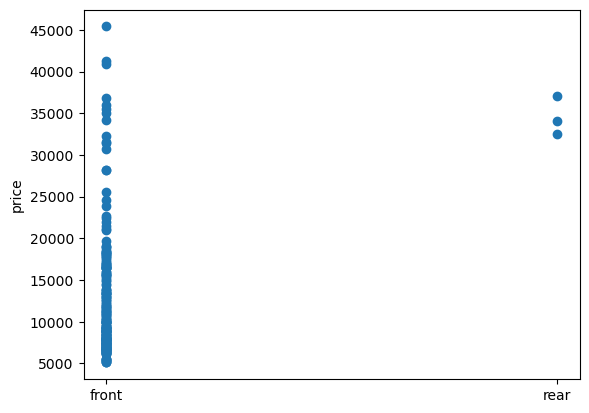

In [21]:
plt.scatter(dataset["enginelocation"], dataset["price"])
plt.ylabel("price")
plt.show()

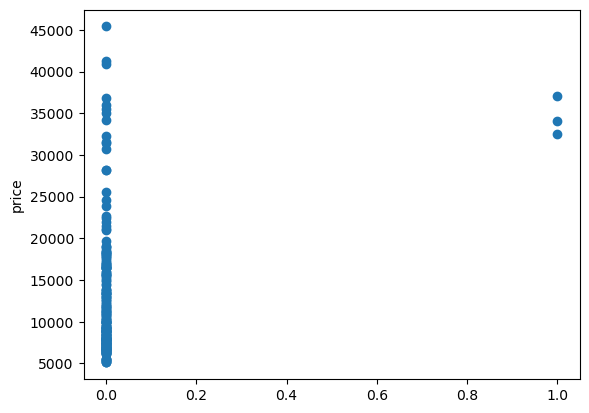

In [22]:
enginelocation_mapper = {"front": 0, "rear": 1}
dataset["enginelocation"] = [enginelocation_mapper[enginelocation_string] for enginelocation_string in dataset["enginelocation"]]

plt.scatter(dataset["enginelocation"], dataset["price"])
plt.ylabel("price")
plt.show()

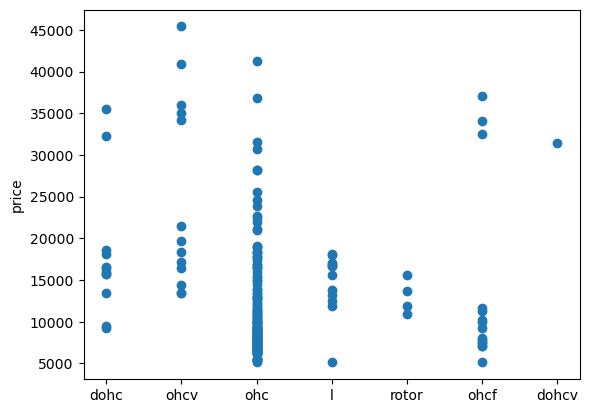

In [23]:
plt.scatter(dataset["enginetype"], dataset["price"])
plt.ylabel("price")
plt.show()

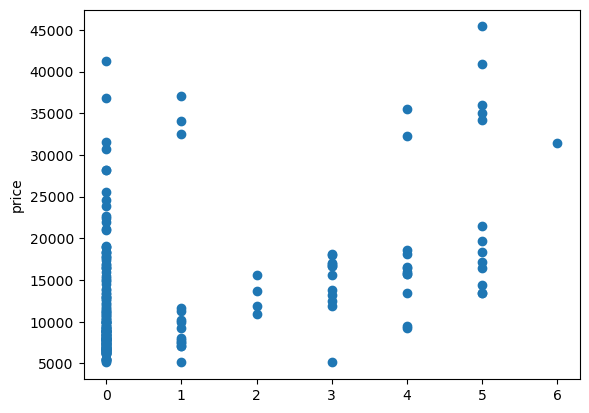

In [24]:
enginetype_mapper = {"ohc": 0, "ohcf": 1, "rotor": 2, "l": 3, "dohc": 4, "ohcv" : 5, "dohcv": 6}
dataset["enginetype"] = [enginetype_mapper[enginetype_string] for enginetype_string in dataset["enginetype"]]

plt.scatter(dataset["enginetype"], dataset["price"])
plt.ylabel("price")
plt.show()

In [25]:
cylindernumber_mapper = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
dataset["cylindernumber"] = [cylindernumber_mapper[cylindernumber_string] for cylindernumber_string in dataset["cylindernumber"]]

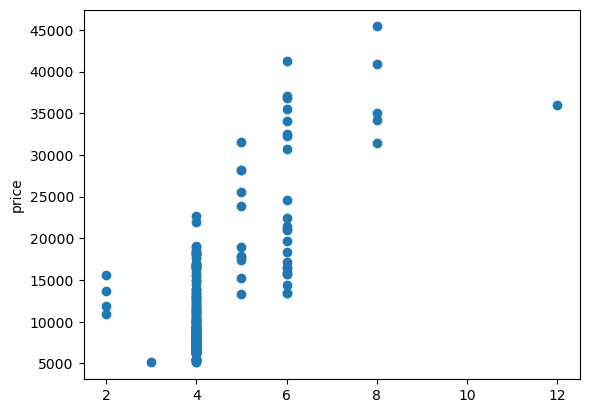

In [26]:
plt.scatter(dataset["cylindernumber"], dataset["price"])
plt.ylabel("price")
plt.show()

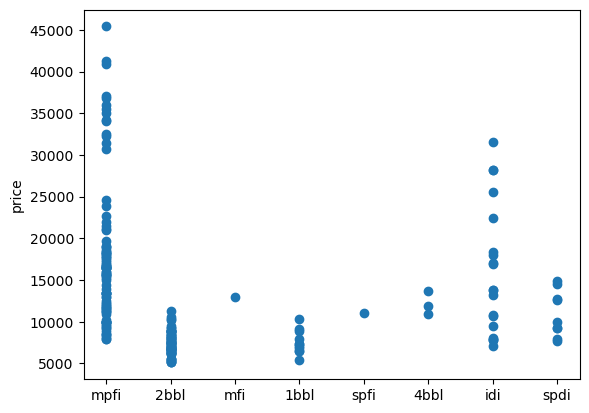

In [27]:
plt.scatter(dataset["fuelsystem"], dataset["price"])
plt.ylabel("price")
plt.show()

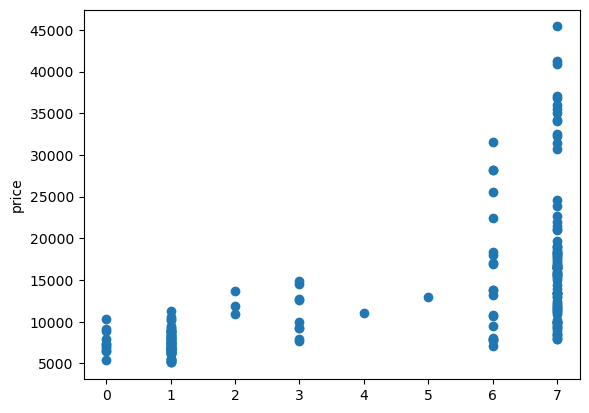

In [28]:
fuelsystem_mapper = {'1bbl': 0, '2bbl': 1, '4bbl': 2, "spdi": 3, 'spfi': 4, 'mfi': 5, "idi": 6, 'mpfi': 7}
dataset["fuelsystem"] = [fuelsystem_mapper[fuelsystem_string] for fuelsystem_string in dataset["fuelsystem"]]

plt.scatter(dataset["fuelsystem"], dataset["price"])
plt.ylabel("price")
plt.show()

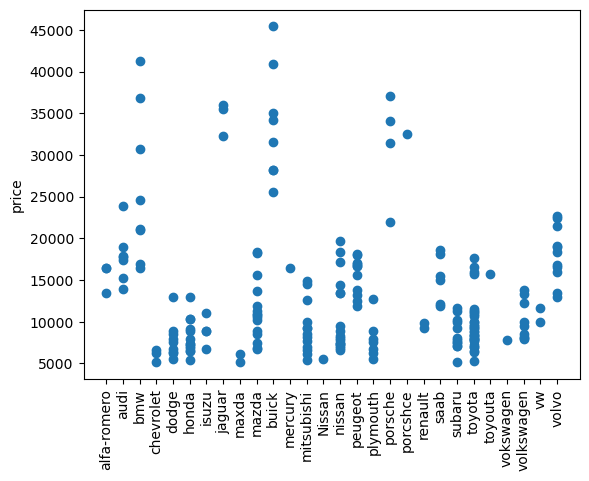

In [29]:
plt.scatter(dataset["company"], dataset["price"])
plt.ylabel("price")

plt.xticks(rotation=90)
plt.show()

In [30]:
company_and_price_df = dataset[["company", "price"]]
company_and_price_df

,company,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
...,...,...
200,volvo,16845.0
201,volvo,19045.0
202,volvo,21485.0
203,volvo,22470.0


In [31]:
company_wise_brand_value = company_and_price_df.groupby("company").mean().to_dict()["price"]
company_wise_brand_value

{'Nissan': 5499.0,
 'alfa-romero': 15498.333333333334,
 'audi': 17859.166714285715,
 'bmw': 26118.75,
 'buick': 33647.0,
 'chevrolet': 6007.0,
 'dodge': 7875.444444444444,
 'honda': 8184.692307692308,
 'isuzu': 8916.5,
 'jaguar': 34600.0,
 'maxda': 5645.0,
 'mazda': 11320.6,
 'mercury': 16503.0,
 'mitsubishi': 9239.76923076923,
 'nissan': 10704.882352941177,
 'peugeot': 15489.09090909091,
 'plymouth': 7963.428571428572,
 'porcshce': 32528.0,
 'porsche': 31118.625,
 'renault': 9595.0,
 'saab': 15223.333333333334,
 'subaru': 8541.25,
 'toyota': 9696.645161290322,
 'toyouta': 15750.0,
 'vokswagen': 7775.0,
 'volkswagen': 10175.555555555555,
 'volvo': 18063.18181818182,
 'vw': 10787.5}

In [32]:
clean_dataset = dataset.assign(brand_value = lambda x: [company_wise_brand_value[company_name] for company_name in x["company"]])
clean_dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,brand_value
0,1,3,alfa-romero giulia,0,0,2,4,1,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333
1,2,3,alfa-romero stelvio,0,0,2,4,1,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333
2,3,1,alfa-romero Quadrifoglio,0,0,2,0,1,0,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333
3,4,2,audi 100 ls,0,0,4,2,0,0,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714
4,5,2,audi 100ls,0,0,4,2,2,0,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,4,2,1,0,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,18063.181818
201,202,-1,volvo 144ea,0,1,4,2,1,0,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,18063.181818
202,203,-1,volvo 244dl,0,0,4,2,1,0,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,18063.181818
203,204,-1,volvo 246,1,1,4,2,1,0,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,18063.181818


In [33]:
clean_dataset.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
company              object
brand_value         float64
dtype: object

In [34]:
clean_dataset = clean_dataset.drop(["CarName", "company"], axis=1)
clean_dataset.dtypes

car_ID                int64
symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
brand_value         float64
dtype: object

# Z-Score Normalization and Train/Test Split

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [36]:
X = clean_dataset.drop(["price"], axis=1)
y = clean_dataset["price"]

In [37]:
X.dtypes

car_ID                int64
symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
brand_value         float64
dtype: object

In [38]:
y.dtype

dtype('float64')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25, shuffle=True)

print("Training Data: ", X_train.shape, y_train.shape)
print("Test Data: ", X_test.shape, y_test.shape)

Training Data:  (153, 25) (153,)
Test Data:  (52, 25) (52,)


In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train[:2]

array([[ 1.04411915,  0.2318746 , -0.36514837, -0.5040817 , -1.22808661,
         0.61176098,  0.96879093, -0.14142136, -0.71410965, -0.47339162,
        -0.93167279, -0.47175348, -0.7715496 , -0.53847036, -0.3398041 ,
        -0.71183884, -1.11078477, -0.58319697, -0.83458223, -0.32434407,
        -0.88923507, -0.62859214,  0.61071826,  0.51160949, -0.50585541],
       [-0.68823504,  0.2318746 , -0.36514837, -0.5040817 , -1.22808661,
        -1.26022762, -0.81705259, -0.14142136, -0.01622976,  0.28107628,
         0.30185037, -0.0326157 , -0.35823553, -0.53847036, -0.3398041 ,
        -0.12968467, -1.11078477,  0.17106454,  0.43334741, -0.41730892,
        -0.5235715 , -0.62859214,  0.13235703,  0.20938458, -0.28180049]])

# Model Training

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Scaling Test Features

In [43]:
X_test_scaled = scaler.transform(X_test)

In [44]:
X_test_scaled[:2]

array([[-0.84108982,  0.2318746 , -0.36514837, -0.5040817 , -1.22808661,
        -1.26022762, -0.81705259, -0.14142136, -0.94132635, -1.26931381,
        -0.83299094,  0.12707077, -1.27671123, -0.53847036, -0.3398041 ,
        -0.88163381, -1.11078477, -1.18660618, -0.41193902, -0.32434407,
        -0.94147272, -0.22492122,  0.92962574,  1.11605932, -0.28180049],
       [ 1.34982872, -1.38070784, -0.36514837, -0.5040817 ,  0.81427482,
        -0.32423332,  0.96879093, -0.14142136,  0.90886682,  1.11016188,
         0.30185037,  0.12707077,  1.10749859,  1.97713162,  1.55074237,
         0.81631586,  0.97876527, -0.28149237,  0.29246634, -0.27786164,
         1.35698399,  0.17874971, -0.98381917, -0.99951507,  0.32931805]])

# Predictions And Performance Metrics

In [45]:
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
y_pred = model.predict(X_test_scaled)

In [47]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

Mean Squared Error:  11782749.603769151
Root Mean Squared Error:  3432.600996878191
R2 Score:  0.8419865701970028


we can see that our model is having 84.1% accuracy and Root Mean Squared Error is about: $ 3433

# Graphical Visualization of Actual vs Predicted Prices w.r.t. Different Features On Test Dataset

<class 'pandas.core.frame.DataFrame'>


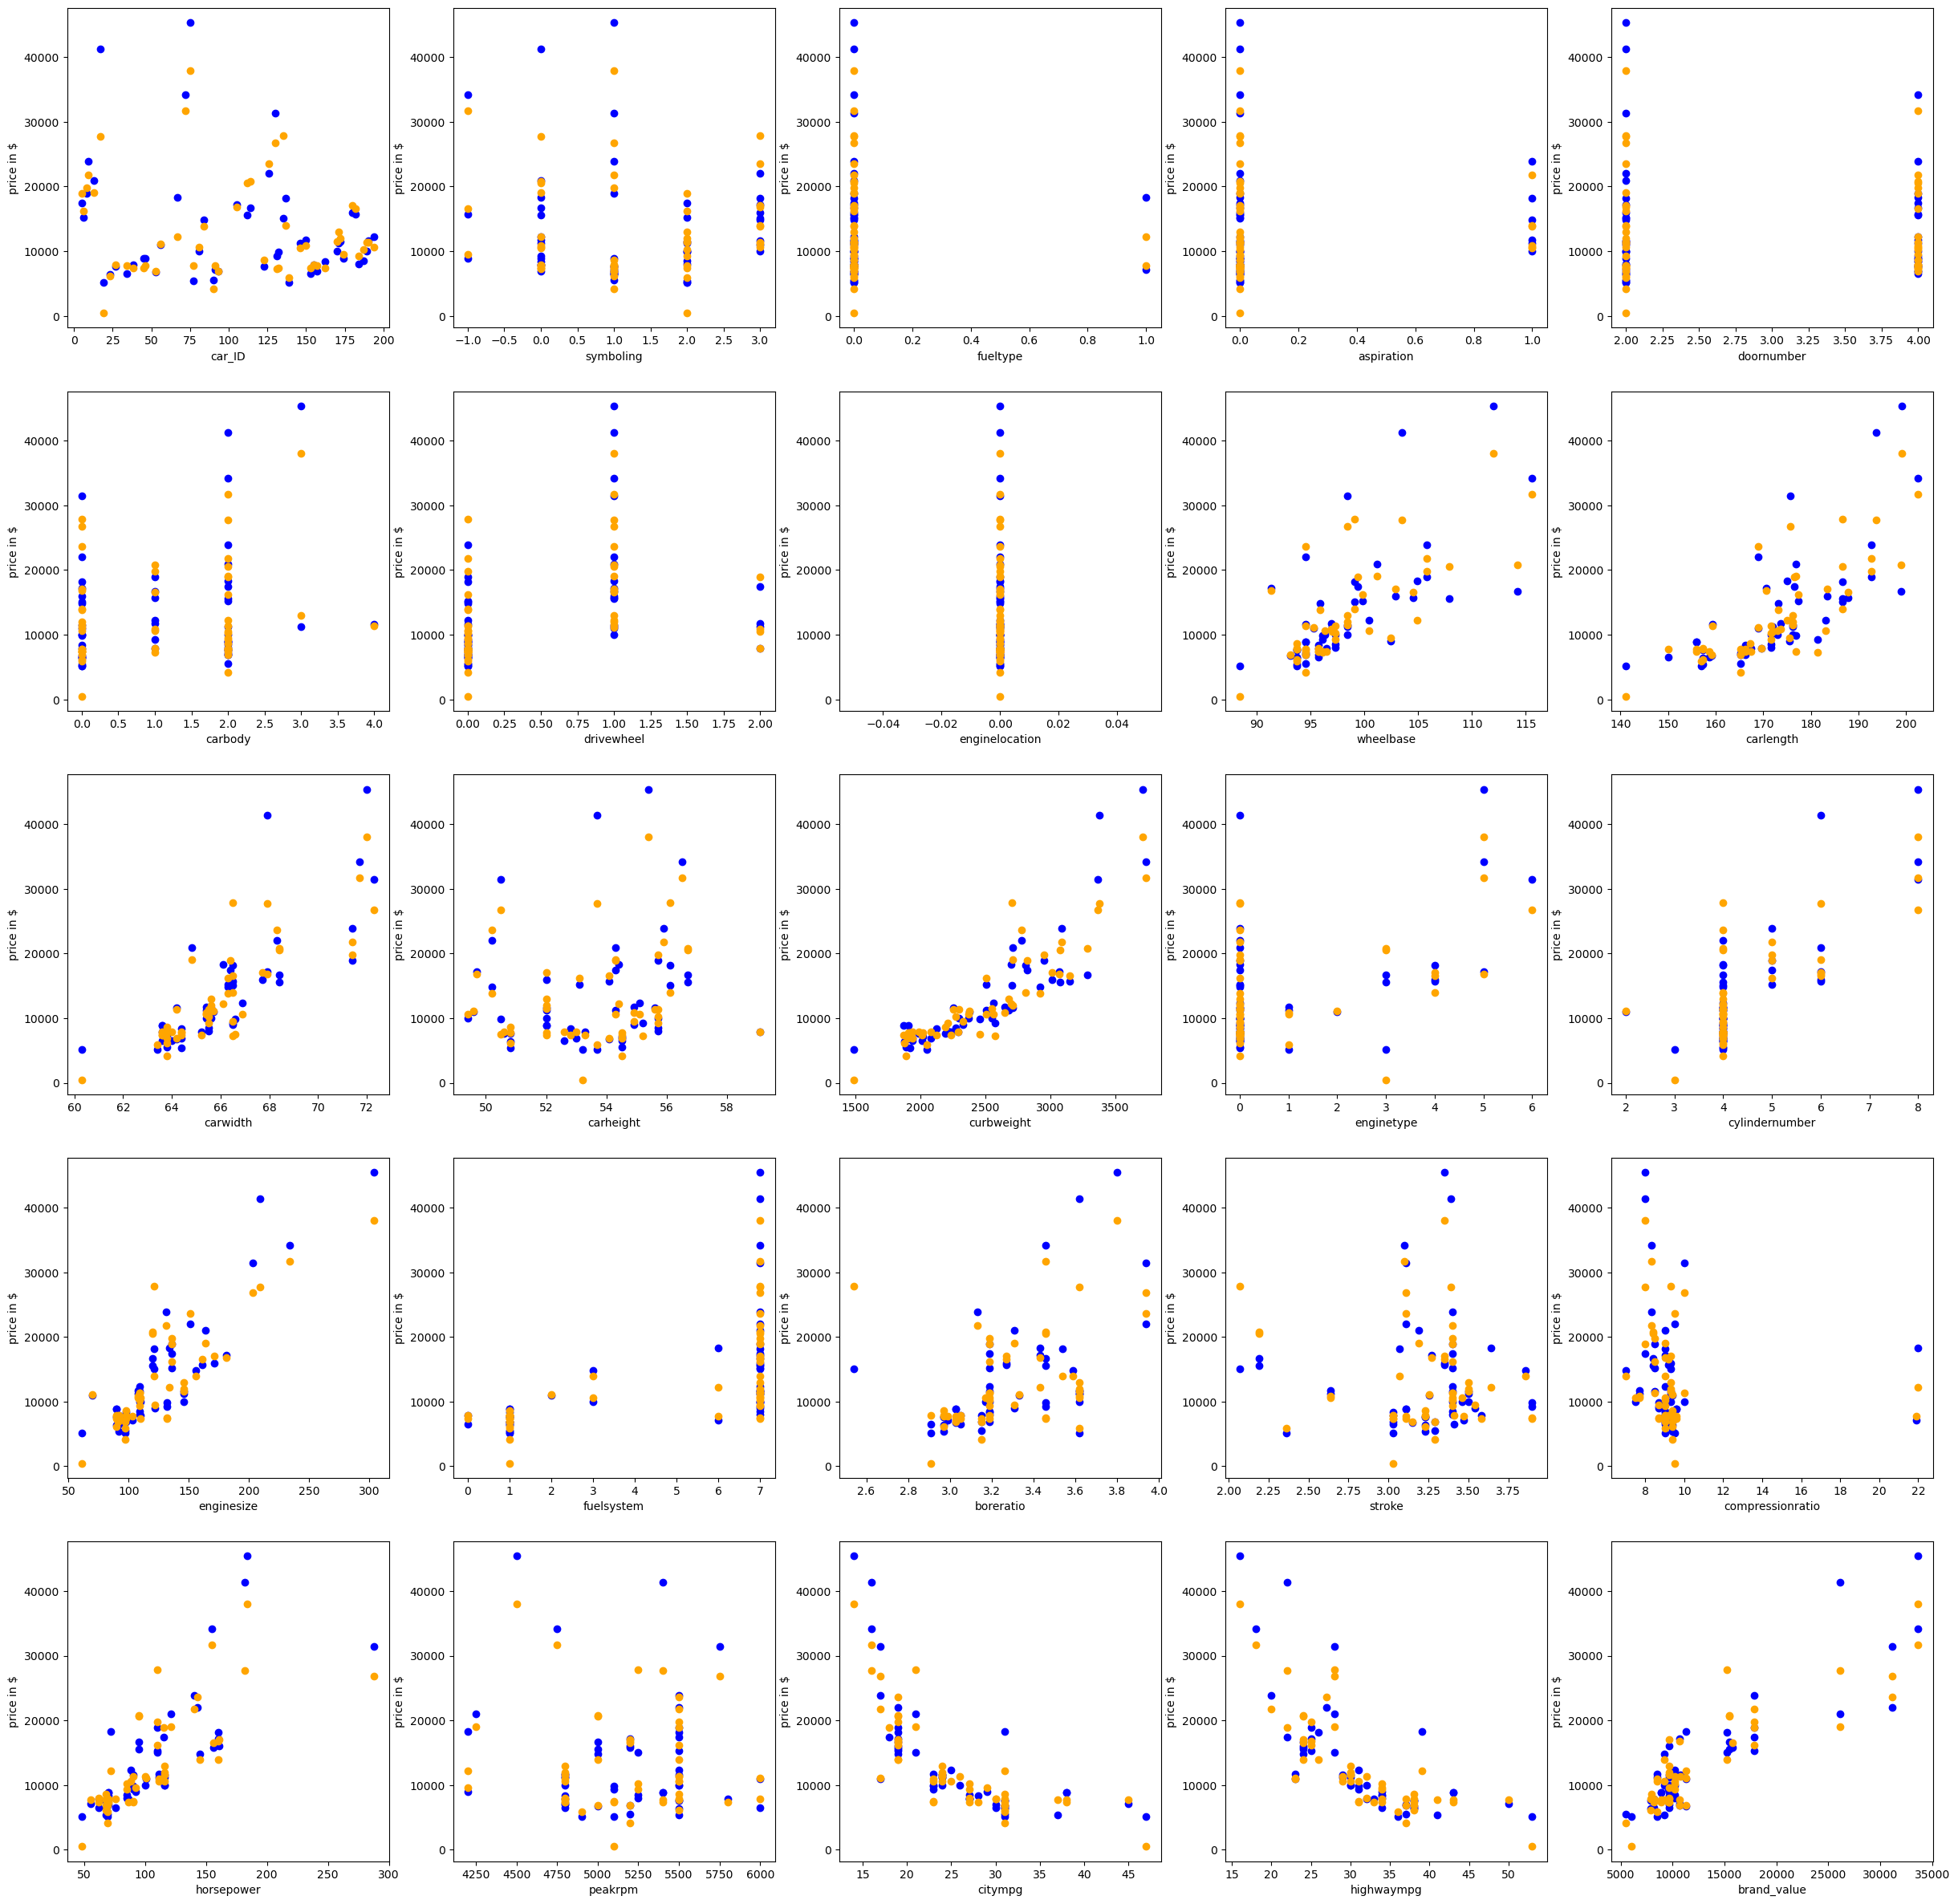

In [48]:
fig, ax = plt.subplots(5,5, figsize=(30,30))
# print(len(ax))
print(type(X_test))
idx = 0
for feature in X_test.columns:
    x = idx // 5
    y = idx % 5
    
    idx += 1
    
    ax[x, y].scatter(X_test[feature], y_test, c='b')
    ax[x, y].scatter(X_test[feature], y_pred, c='orange')
    
    ax[x, y].set_xlabel(feature)
    ax[x, y].set_ylabel("price in $")
    
plt.show()

### HERE categorical fields are mapped as per following
fueltype_mapper = {"gas": 0, "diesel": 1}

aspiration_mapper = {"std": 0, "turbo": 1}

carbody_mapper = {"hatchback": 0, "sedan": 2, "wagon": 1, "hardtop": 3, "convertible": 4}

drivewheel_mapper = {"fwd": 0, "rwd": 1, "4wd": 2}

enginelocation_mapper = {"front": 0, "rear": 1}

enginetype_mapper = {"ohc": 0, "ohcf": 1, "rotor": 2, "l": 3, "dohc": 4, "ohcv" : 5, "dohcv": 6}

cylindernumber_mapper = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}

fuelsystem_mapper = {'1bbl': 0, '2bbl': 1, '4bbl': 2, "spdi": 3, 'spfi': 4, 'mfi': 5, "idi": 6, 'mpfi': 7}

company_wise_brand_value = {'Nissan': 5499.0,
 'alfa-romero': 15498.333333333334,
 'audi': 17859.166714285715,
 'bmw': 26118.75,
 'buick': 33647.0,
 'chevrolet': 6007.0,
 'dodge': 7875.444444444444,
 'honda': 8184.692307692308,
 'isuzu': 8916.5,
 'jaguar': 34600.0,
 'maxda': 5645.0,
 'mazda': 11320.6,
 'mercury': 16503.0,
 'mitsubishi': 9239.76923076923,
 'nissan': 10704.882352941177,
 'peugeot': 15489.09090909091,
 'plymouth': 7963.428571428572,
 'porcshce': 32528.0,
 'porsche': 31118.625,
 'renault': 9595.0,
 'saab': 15223.333333333334,
 'subaru': 8541.25,
 'toyota': 9696.645161290322,
 'toyouta': 15750.0,
 'vokswagen': 7775.0,
 'volkswagen': 10175.555555555555,
 'volvo': 18063.18181818182,
 'vw': 10787.5}
 
 ***here company wise brand value is calculated as mean value of cars of that brand in our given dataset**
